<a href="https://colab.research.google.com/github/StevenIQ/CIFAR-10_Vidal/blob/main/Projet_DL__Cifar10_Vidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.utils import  np_utils
from keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard( histogram_freq=1)

In [ ]:
def loadData():
  (xtrain,ytrain),(xtest,ytest) = cifar10.load_data()
  return xtrain, ytrain, xtest, ytest

In [ ]:
def prepData(xtrain, ytrain, xtest,ytest, nbClasses):
  
  ytrain = np_utils.to_categorical(ytrain, nbClasses)
  ytest = np_utils.to_categorical(ytest, nbClasses)
  xtrain = xtrain.astype('float32')
  xtest = xtest.astype('float32')
  
  mean = np.mean(xtrain, axis= (0,1,2,3))
  std = np.std(xtrain, axis = (0,1,2,3))
  xtrain = xtrain / 255.0
  xtest = xtest / 255.0
  # xtrain = (xtrain - mean)/(std+1e-7)
  # xtest = (xtest - mean)/(std+1e-7)
  return xtrain,ytrain,xtest,ytest

In [ ]:
class CustomCallback(Callback):
  def on_epoch_end(self, epoch, logs ={}):
    if (epoch %5 ==0):
      print("epoch finished: ", epoch)
      print("---------------------------")
      print(logs)
      # print("loss on training dataset: ", logs.history['loss'])
      # print('Loss on validation dataset: ', logs.histort['val_loss'])
      # print('Accuracy training: ', logs.history['categorical_accuracy'])
      # print('Accuracy validation dataset: ', logs.history['val_categorical_accuracy'])
      # print('\n')
      return


In [ ]:
cc = CustomCallback()

In [ ]:
def baselineSteven(xtrain,ytrain,xval,yval, epochs,batch_size, nbClasses, activationF,loss_func, opt):
  model = Sequential()
  #block1
  model.add(Conv2D(32,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2)) # overfitting regul
  #bock2
  model.add(Conv2D(64,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.3)) # overfitting regul
  #block3
  model.add(Conv2D(128,(3,3), activation= activationF, padding= 'same', kernel_initializer = 'he_uniform',input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(128,(3,3), activation=activationF,padding= 'same',kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.4)) # overfitting regul
  

  model.add(Flatten())
  model.add(Dense(128, activation= activationF))
  model.add(Dropout(0.5)) # overfitting regul
  model.add(Dense(10, activation=keras.activations.softmax))
  
  model.compile(optimizer = opt, loss= loss_func, metrics=keras.metrics.categorical_accuracy)
  # logs = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = epochs, batch_size= batch_size, verbose= 0, callbacks=[cc])
  model.summary()


  return model

In [ ]:
def plotModels(all_logs):
  for logs in all_logs:
    plt.title('Cross Entropy Loss')
    losses = logs.history['loss']
    plt.plot(losses)
  plt.show()
  for logs in all_logs:
    valLoss = logs.history['val_loss']
    plt.title('Validation loss')
    plt.plot(valLoss)
  plt.show()


  for logs in all_logs:
    metric = logs.history['categorical_accuracy']
    plt.title('Accuracy train')
    plt.plot(list(range(len(metric))), metric)
  plt.show()

  for logs in all_logs:
    plt.title('Accuracy test')
    metric = logs.history['val_categorical_accuracy']
    plt.plot(list(range(len(metric))), metric)
  plt.show()
  

In [ ]:
def mlp(activation):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(2048,  activation=activation))#input_shape=(3072,),
  model.add(Dropout(0.1))
  model.add(Dense(1024, activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation=activation))

  #kernel_regularizer=keras.regularizers.l2(0.0001)
  model.add(Dense(10, activation= keras.activations.softmax))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adam(lr = 0.0001, beta_1= 0.9, decay = 0.8), metrics=keras.metrics.categorical_accuracy)
  # model.summary()
  return model

In [ ]:
def mlp1(activation):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(4016, activation=activation))
  model.add(Dropout(0.25))
  model.add(Dense(2048, activation=activation))


  
  model.add(Dense(10, activation= keras.activations.softmax))
  #beta_1=0.9,beta_2=0.999, decay =0.8|
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adam(lr = 0.0006,beta_1=0.9,beta_2=0.999, decay =0.8), metrics=keras.metrics.categorical_accuracy)
  # model.summary()
  return model

In [ ]:
def linearModel():
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(10, activation = keras.activations.softmax))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adam(lr = 0.0006), metrics=keras.metrics.categorical_accuracy)
  return model

In [ ]:
def mainSteven():
  xtrain,ytrain,xval,yval = loadData()
  xtrain,ytrain,xval,yval = prepData(xtrain,ytrain,xval,yval,10)
  epochs = 500
  # # model = mlp(keras.activations.relu)
  # # model = linearModel()
  # # logs = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = epochs, batch_size= 128, verbose= 0, callbacks =[cc])
  # # xtrain = xtrain.reshape(50000, 32 * 32 * 3)
  # # xval = xval.reshape(10000, 32 * 32 * 3)
  LOGS =[]
  # # LOGS.append(logs)

  # # logs = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = epochs, batch_size= 128, verbose= 1)
  # # LOGS.append(logs)
  # # model = mlp(keras.activations.tanh)
  # # logs = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = epochs, batch_size= 128, verbose= 1)
  # # LOGS.append(logs)
  # model = mlp1(keras.activations.selu)
  # logs = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = epochs, batch_size= 128, verbose= 0,callbacks = [cc])
  # LOGS.append(logs)

  # plotModels(LOGS)
  
  model = baselineSteven(xtrain, ytrain, xval, yval, epochs, 64, 10, keras.activations.selu, keras.losses.categorical_crossentropy, keras.optimizers.SGD(lr= 0.001, momentum= 0.96) )
  dataAugment = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip= True)
  dataAugment.fit(xtrain)
  train = dataAugment.flow(xtrain,ytrain, batch_size = 64)
  steps = int(xtrain.shape[0]/64)
  logs = model.fit_generator(train, steps_per_epoch = steps, epochs = epochs, validation_data =(xval, yval), verbose = 0, callbacks= [cc])
  _, acc = model.evaluate(xval, yval)
  model.save('relu+dataAugment_1.h5')
  print('>%.3f'%(acc*100))
  LOGS.append(logs)

  # plotModels(LOGS)
  # # # print(xtrain.shape,ytrain.shape,xval.shape, yval.shape)
  # allLogs = []
  # allLogs.append([logs, 'relu'])
  # %tensorboard logs
  #logs = modelLinear(xtrain,ytrain,xval,yval, 50, 64, 10, keras.activations.relu, keras.losses.categorical_crossentropy, keras.optimizers.SGD(lr=0.05, momentum=0.95))
  #allLogs.append(logs)
  # blue line
  # logs = baselineSteven(xtrain, ytrain, xval, yval, epoch, 64, 10, keras.activations.relu, keras.losses.categorical_crossentropy, keras.optimizers.SGD(lr= 0.0001, momentum= 0.90) )
  # labels.append("relu")
  # allLogs.append([logs, 'relu'])
  # orange line
  # logs = baselineSteven(xtrain, ytrain, xval, yval, epoch, 64, 10, keras.activations.selu, keras.losses.categorical_crossentropy, keras.optimizers.SGD(lr= 0.0001, momentum= 0.95) )
  # allLogs.append([logs, 'selu'])
  # labels.append('selu')
  # green line
  # logs = baselineSteven(xtrain, ytrain, xval, yval, epoch, 64, 10, keras.activations.tanh, keras.losses.categorical_crossentropy, keras.optimizers.SGD(lr= 0.0001, momentum= 0.95) )
  # allLogs.append([logs, 'tanh'])
  # labels.append('tanh')
  

In [ ]:
mainSteven()

170500096/170498071 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_______________________________________________________

In [ ]:
  # %tensorboard --logdir logs

In [ ]:
m = tf.keras.models.load_model('model_final.h5')
xtrain,ytrain,xtest, ytest = loadData()
xtrain,ytrain,xtest, ytest = prepData(xtrain,ytrain,xtest, ytest, 10)

In [ ]:
dataAugment = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip= True)
dataAugment.fit(xtrain)
train = dataAugment.flow(xtrain,ytrain, batch_size = 64)
steps = int(xtrain.shape[0]/64)
logs = m.fit_generator(train, steps_per_epoch = steps, epochs = 400, validation_data =(xtest, ytest), verbose = 0, callbacks= [cc])
_, acc = m.evaluate(xtest, ytest)
print("---------------------")
print('>%.3f'%(acc*100))

epoch finished:  0
---------------------------
{'loss': 0.1906559020280838, 'categorical_accuracy': 0.9331144094467163, 'val_loss': 0.3187893033027649, 'val_categorical_accuracy': 0.9088000059127808}
epoch finished:  5
---------------------------
{'loss': 0.19277207553386688, 'categorical_accuracy': 0.9337752461433411, 'val_loss': 0.3347410261631012, 'val_categorical_accuracy': 0.9049999713897705}
epoch finished:  10
---------------------------
{'loss': 0.18725690245628357, 'categorical_accuracy': 0.9342358112335205, 'val_loss': 0.36592525243759155, 'val_categorical_accuracy': 0.8982999920845032}
epoch finished:  15
---------------------------
{'loss': 0.1902921348810196, 'categorical_accuracy': 0.9335349202156067, 'val_loss': 0.34052979946136475, 'val_categorical_accuracy': 0.9020000100135803}
epoch finished:  20
---------------------------
{'loss': 0.18844912946224213, 'categorical_accuracy': 0.9342958927154541, 'val_loss': 0.3414970636367798, 'val_categorical_accuracy': 0.9025999903

In [ ]:
m.save("model_final_1.h5")

NameError: ignored

In [ ]:
def plotModel(logs):
  plt.title('Cross Entropy Loss')
  losses = logs.history['loss']
  plt.plot(losses)
  plt.show()

  plt.title('Validation loss')
  valLoss = logs.history['val_loss']
  plt.plot(valLoss)
  plt.show()

  metric = logs.history['categorical_accuracy']
  plt.title('Accuracy train')
  plt.plot(list(range(len(metric))), metric)
  plt.show()

  plt.title('Accuracy test')
  metric = logs.history['val_categorical_accuracy']
  plt.plot(list(range(len(metric))), metric)
  plt.show()


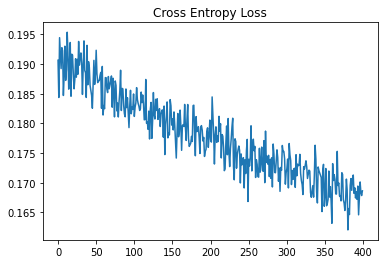

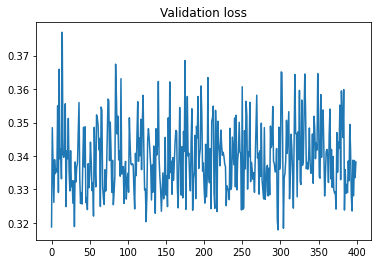

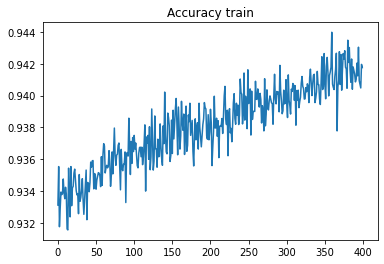

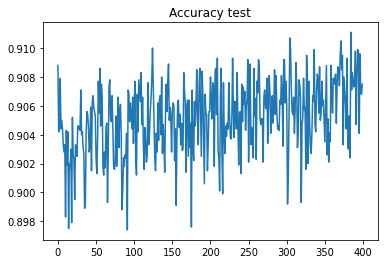

In [ ]:
plotModel(logs)

In [ ]:
_, acc = m.evaluate(xtest,ytest)
print('>%.3f'%(acc*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.3382 - categorical_accuracy: 0.9075
>90.750
